In [4]:
from IPython.display import Markdown as md
from IPython.display import SVG
import sympy as sp
from sympy import symbols

"""
x = symbols("x", positive = True)
ypp = symbols("y^{\prime\prime}", negative = True)
yp = symbols("y^{\prime}", negative = True)
y = symbols("y", positive = True)
A = symbols("A", positive =True)
C= symbols("C")
l = symbols("\lambda", positive = True)
s = symbols("s", positive = True)
V = symbols("V")
r = symbols("r")
"""
x = symbols("x")

ypp = symbols("y^{\prime\prime}")
yp = symbols("y^{\prime}")
y = symbols("y")

yppr = symbols("y^{\prime\prime}_r")
ypr = symbols("y^{\prime}_r")
yr = symbols("y_r")

A = symbols("A")
C= symbols("C")
l = symbols("\lambda")
s = symbols("s")
V = symbols("V")
r = symbols("r")

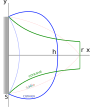

In [5]:
SVG(filename ="drawing.svg")

Minimize surface
$$
dS = \sqrt{1+y^{\prime}} dx
$$
with constant volume
$$
dV = y dx
$$
Functional to minimize
$$
F = S + \lambda V
$$

other constrains:
$$
y(0) = s/2
\\
y(r) = 0
\\
y^{\prime}(r) < 0
$$

$$
F(y^{\prime}, y) = \sqrt{1+(y^{\prime})^2} + \lambda y
$$

Beltrami identity

$$
F - y^{\prime} \frac{\partial F}{\partial y^{\prime}} = C
$$

In [6]:
F = sp.sqrt(1+yp**2) + l*y
second = F.diff(yp)*yp
second_term = r"y^{\prime} \frac{\partial F}{\partial y^{\prime}}"
md(f"$${second_term} = {sp.latex(second)}$$")

$$y^{\prime} \frac{\partial F}{\partial y^{\prime}} = \frac{\left(y^{\prime}\right)^{2}}{\sqrt{\left(y^{\prime}\right)^{2} + 1}}$$

Legendre test

$$
\frac{\partial ^2 F}{\partial (y^{\prime})^2} = 0
$$

In [9]:
F.diff(yp).diff(yp).simplify()

(y^{\prime}**2 + 1)**(-3/2)

In [83]:
lhs = F - second - C
display(lhs)
lhs = lhs.simplify()
eq = sp.Eq(lhs, 0)
display(eq)


-C + \lambda*y - y^{\prime}**2/sqrt(y^{\prime}**2 + 1) + sqrt(y^{\prime}**2 + 1)

Eq(-C + \lambda*y + 1/sqrt(y^{\prime}**2 + 1), 0)

In [84]:
print("let x = r")

eq_r = eq.subs(y, yr).subs(yp, ypr)
display(eq_r)
eq_r = eq_r.subs(yr, 0)
C_ = sp.solve(eq_r, C)[0]
display(sp.Eq(C, C_))
eq2 = sp.Eq(lhs.subs(C,C_), 0)
display(eq2)


let x = r


Eq(-C + \lambda*y_r + 1/sqrt(y^{\prime}_r**2 + 1), 0)

Eq(C, 1/sqrt(y^{\prime}_r**2 + 1))

Eq(\lambda*y - 1/sqrt(y^{\prime}_r**2 + 1) + 1/sqrt(y^{\prime}**2 + 1), 0)

In [85]:
yp_roots = sp.solve(lhs, yp)
display(*[sp.Eq(yp, yp_root) for yp_root in yp_roots])

Eq(y^{\prime}, -sqrt(-1 + (-C + \lambda*y)**(-2)))

Eq(y^{\prime}, sqrt(-1 + (-C + \lambda*y)**(-2)))

In [86]:
yp_roots[0].subs({yp:ypr, y: 0})

-sqrt(-1 + C**(-2))

In [87]:
dx, dy = symbols("dx dy")
pm = symbols("\pm1")
yp_ = pm*yp_roots[1].simplify()
lhs = sp.solve((yp_ - yp).subs(yp, dy/dx), dx)[0]
sp.Eq(lhs, dx)

Eq(dy/(\pm1*sqrt(-1 + (-C + \lambda*y)**(-2))), dx)

In [88]:
#u = 1 - (l*y-1)**2
#u = 1 - (l*(y-yr)-1)**2
u = 1 - (l*y-C)**2
print("substitute")
display(sp.Eq(symbols("u"), u))

du = u.diff(y)
eq=sp.Eq(symbols("du"), du*dy)
display(eq)
dy_ = sp.solve(eq, dy)[0]
display(sp.Eq(symbols("dy"), dy_))

substitute


Eq(u, 1 - (-C + \lambda*y)**2)

Eq(du, -2*\lambda*dy*(-C + \lambda*y))

Eq(dy, du/(2*\lambda*(C - \lambda*y)))

In [89]:
u_ = symbols("u")
rhs = x-A
integrand = pm*1/(2*l*sp.sqrt(u_))
print("integrand:")
display(integrand)
print("after integration")
lhs = sp.integrate(integrand, u_)
eq = sp.Eq(lhs, rhs)
display(eq)
print("finally, after substitution")
eq = eq.subs(u_, u)
display(eq)

integrand:


\pm1/(2*\lambda*sqrt(u))

after integration


Eq(\pm1*sqrt(u)/\lambda, -A + x)

finally, after substitution


Eq(\pm1*sqrt(1 - (-C + \lambda*y)**2)/\lambda, -A + x)

In [90]:
eq2 = sp.Eq(eq.args[0]**2, eq.args[1]**2).subs(pm, 1)
display(eq2)
print("let x = r")
eqA = eq2.subs(x, r).subs(y, yr).simplify()
display(eqA)
eqA = eqA.subs(yr, 0).simplify()
display(eqA)

print("let x = 0")
eq0 = eq2.subs(x, 0).subs(y, s)
display(eq0)



Eq((1 - (-C + \lambda*y)**2)/\lambda**2, (-A + x)**2)

let x = r


Eq((A - r)**2, (1 - (C - \lambda*y_r)**2)/\lambda**2)

Eq((A - r)**2, (1 - C**2)/\lambda**2)

let x = 0


Eq((1 - (-C + \lambda*s)**2)/\lambda**2, A**2)

In [91]:
# = symbols("A^2", positive = True)
C_ = sp.solve(eq0, C)[0]
display(sp.Eq(C, C_))

Eq(C, \lambda*s - sqrt(-A**2*\lambda**2 + 1))

In [92]:
C_ = l*s - pm*sp.sqrt(1-A**2*l**2)
C_

\lambda*s - \pm1*sqrt(-A**2*\lambda**2 + 1)

In [94]:
y_roots = sp.solve(eq2, y)
y_roots[0] = y_roots[0].subs(C, C_)
y_roots[1] = y_roots[1].subs(C, C_)

display(*[sp.Eq(y, y_root) for y_root in y_roots])

Eq(y, (\lambda*s - \pm1*sqrt(-A**2*\lambda**2 + 1) - sqrt((-A*\lambda + \lambda*x + 1)*(A*\lambda - \lambda*x + 1)))/\lambda)

Eq(y, (\lambda*s - \pm1*sqrt(-A**2*\lambda**2 + 1) + sqrt((-A*\lambda + \lambda*x + 1)*(A*\lambda - \lambda*x + 1)))/\lambda)

In [97]:
y_ = s - (pm*sp.sqrt(1-A**2*l**2) - pm*sp.sqrt(1-(x-A)**2*l**2))/l
y_.collect(pm)

s - \pm1*(sqrt(-A**2*\lambda**2 + 1) - sqrt(-\lambda**2*(-A + x)**2 + 1))/\lambda

In [110]:
eq_0 = sp.Eq(y_.subs(x, r), 0).subs(pm, 1)
eq_0

Eq(s - (sqrt(-A**2*\lambda**2 + 1) - sqrt(-\lambda**2*(-A + r)**2 + 1))/\lambda, 0)

In [111]:
l_roots = sp.solve(eq_0, l)
l_roots[0] = l_roots[0].subs(pm**2, 1)
l_roots[1] = l_roots[1].subs(pm**2, 1)
display(*l_roots)

-2*s*sqrt(1/((r**2 + s**2)*(4*A**2 - 4*A*r + r**2 + s**2)))

2*s*sqrt(1/((r**2 + s**2)*(4*A**2 - 4*A*r + r**2 + s**2)))

In [118]:
y__ = y_.subs(l, l_roots[1]).subs(pm, 1).simplify()

In [120]:
y__.subs(x, r).simplify()

s - (sqrt(-4*A**2*s**2/((r**2 + s**2)*(4*A**2 - 4*A*r + r**2 + s**2)) + 1) - sqrt(-4*s**2*(-A + r)**2/((r**2 + s**2)*(4*A**2 - 4*A*r + r**2 + s**2)) + 1))/(2*s*sqrt(1/((r**2 + s**2)*(4*A**2 - 4*A*r + r**2 + s**2))))

In [136]:
a, b, V = symbols("a b V")
y = a*x**2 + b*x + s
V_ = sp.integrate(y, (x, 0, r))


In [144]:
res = sp.solve([sp.Eq(y.subs(x, r), 0), sp.Eq(V, V_)], [a, b])
a_ = res[a]
b_ = res[b]

In [147]:
y_ = y.subs({a:a_, b:b_}).simplify()